In [154]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [157]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Set number of classes

In [160]:
NUM_CLASSES = 15

# Dataset reading

In [163]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [164]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [170]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [172]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 15)             │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,235 (4.82 KB)

 Trainable params: 1,235 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [176]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [181]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.5721
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7654 - loss: 0.6349 - val_accuracy: 0.9969 - val_loss: 0.2483
Epoch 2/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7188 - loss: 0.6602
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7526 - loss: 0.6251 - val_accuracy: 0.9953 - val_loss: 0.2425
Epoch 3/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7734 - loss: 0.5690
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7652 - loss: 0.6177 - val_accuracy: 0.9969 - val_loss: 0.2509
Epoch 4/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6953 - loss: 0.7379
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [182]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9917 - loss: 0.2041 


In [183]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [184]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[2.0070276e-03 3.5037352e-03 2.1821157e-04 5.0234772e-05 4.2198345e-02
 3.0526316e-02 5.2265693e-07 3.1997311e-05 9.0986860e-01 1.2333147e-03
 2.1658943e-06 2.9827988e-05 5.3553103e-04 9.6478797e-03 1.4631770e-04]
8


# Confusion matrix

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


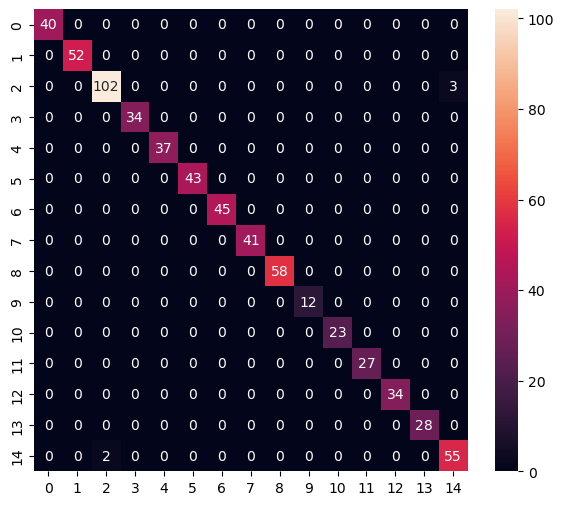

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        52
           2       0.98      0.97      0.98       105
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        58
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        28
          14       0.95      0.96      0.96        57

    accuracy                           0.99       636
   macro avg       1.00      1.00      1.00       636
weig

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [188]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [189]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sabbi\AppData\Local\Temp\tmp6ewgppcg\assets


INFO:tensorflow:Assets written to: C:\Users\sabbi\AppData\Local\Temp\tmp6ewgppcg\assets


Saved artifact at 'C:\Users\sabbi\AppData\Local\Temp\tmp6ewgppcg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2131507594640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2131507598672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2131507597520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2131507595600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2131507597136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2131507595408: TensorSpec(shape=(), dtype=tf.resource, name=None)


7056

# Inference test

In [191]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\sabbi\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [192]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [193]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [194]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 997 μs


In [195]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0070304e-03 3.5037333e-03 2.1821179e-04 5.0234867e-05 4.2198345e-02
 3.0526299e-02 5.2265790e-07 3.1997341e-05 9.0986860e-01 1.2333159e-03
 2.1658923e-06 2.9828016e-05 5.3553103e-04 9.6478835e-03 1.4631756e-04]
8
